In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy import spatial
import ipywidgets
import pandas as pd

import pandas as pd
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
df

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [3]:
features_df=df.data
target_df=df.target
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### Summary Statistics

In [4]:
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


#### Histograms

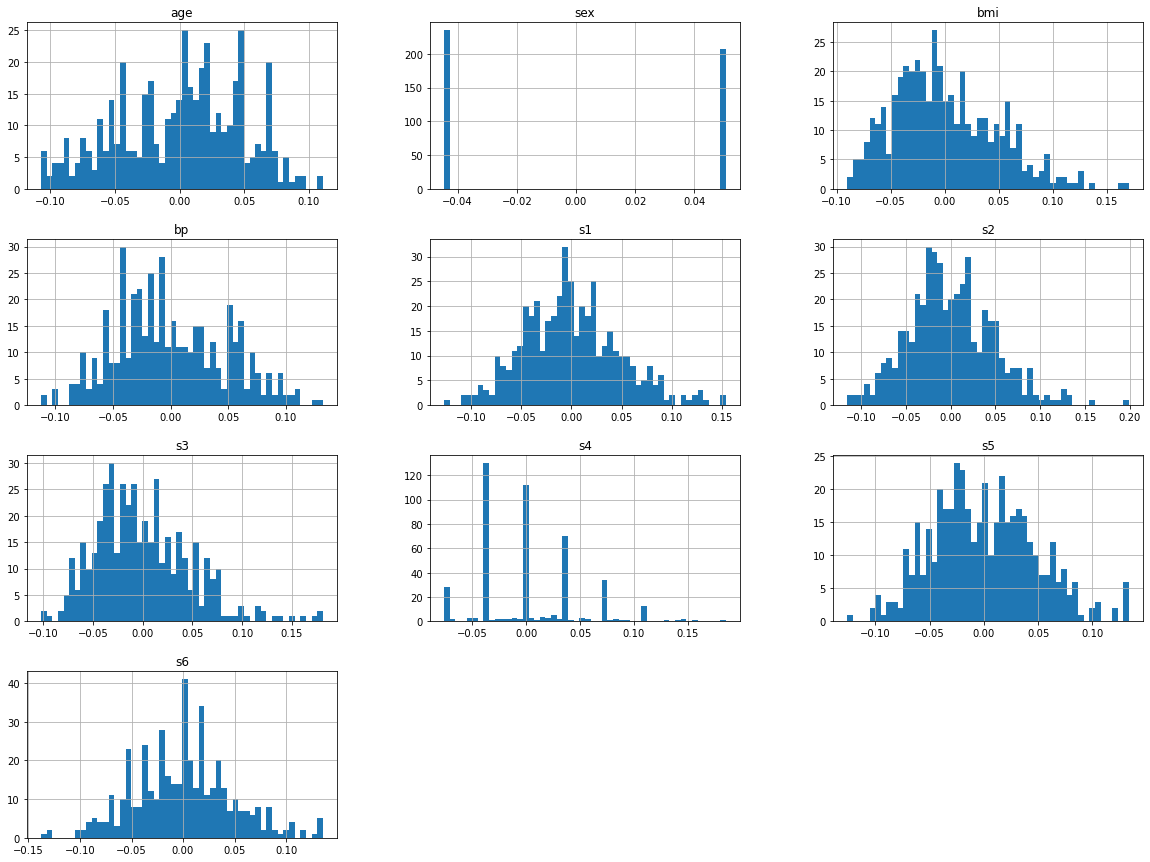

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
features_df.hist(bins=50, figsize=(20,15))

plt.show()

#### scatter plots:

* age

age


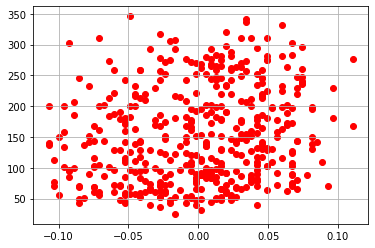

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

print('\033[94m\033[1mage\033[0m')
ax1=plt.scatter(features_df.age, target_df, color='red' )
plt.grid()
plt.show()

* sex:

sex


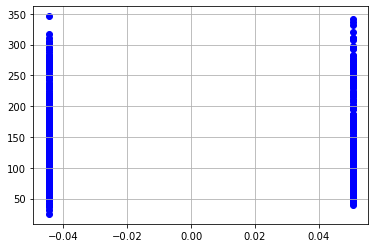

In [18]:
print('\033[95m\033[1msex\033[0m')
ax2=plt.scatter(features_df.sex, target_df, color='blue' )
plt.grid()

* bmi:

bmi


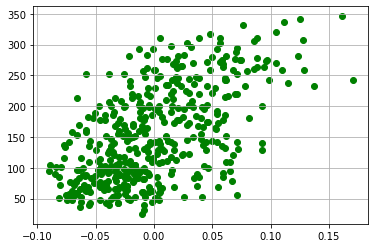

In [19]:
print('\033[93m\033[1mbmi\033[0m')
ax2=plt.scatter(features_df.bmi, target_df, color='green' )
plt.grid()

* bp:

bp


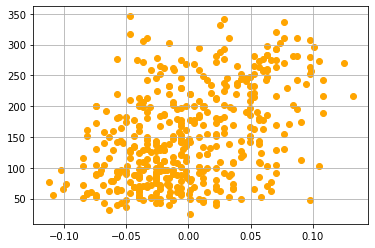

In [20]:
print('\033[92m\033[1mbp\033[0m')
ax2=plt.scatter(features_df.bp, target_df, color='orange' )
plt.grid()

In [22]:
!pip install yellowbrick

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\patri\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



#### Find the column in features_df that has the highest correlation coefficient with the target values in target_df

In [26]:
df.data.corr().style.background_gradient(cmap="YlOrBr")
# From the below chart, s1 and s2 are highly correlated with number of 0.896663.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


#### Split the data into a training set and test set

In [28]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [29]:
np.random.seed(0)

In [30]:
Xactual = np.linspace(0, 1, 442)
yactual = true_fun(Xactual)

In [31]:
n_samples = 50
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [33]:
X

array([0.0187898 , 0.0202184 , 0.06022547, 0.07103606, 0.0871293 ,
       0.11827443, 0.1289263 , 0.14335329, 0.21038256, 0.26455561,
       0.31542835, 0.3595079 , 0.36371077, 0.38344152, 0.41466194,
       0.4236548 , 0.43703195, 0.43758721, 0.45615033, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.56843395, 0.60276338, 0.61209572, 0.616934  , 0.6176355 ,
       0.63992102, 0.64589411, 0.66676672, 0.67063787, 0.6818203 ,
       0.6976312 , 0.71518937, 0.77423369, 0.77815675, 0.78052918,
       0.79172504, 0.79915856, 0.83261985, 0.87001215, 0.891773  ,
       0.92559664, 0.94374808, 0.94466892, 0.96366276, 0.97861834])

In [34]:
np.random.seed(49)

In [35]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [36]:
train_test, test_set = split_train_test(df.data, 0.2)
len(test_set)

88

In [37]:
test_set.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
421,0.038076,0.050680,0.016428,0.021872,0.039710,0.045032,-0.043401,0.071210,0.049769,0.015491
285,0.012648,-0.044642,-0.020218,-0.015999,0.012191,0.021233,-0.076536,0.108111,0.059881,-0.021788
291,0.074401,-0.044642,0.018584,0.063187,0.061725,0.042840,0.008142,-0.002592,0.058039,-0.059067
269,0.009016,-0.044642,-0.032073,-0.026328,0.042462,-0.010395,0.159089,-0.076395,-0.011901,-0.038357
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071022,0.048628


#### Using this feature and target, perform linear regression with sklearn's LinearRegression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df.data[['bmi']]
y = df.data[['bp']]

In [39]:
X.head()

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [40]:
y.head()

,bp
0,0.021872
1,-0.026328
2,-0.005671
3,-0.036656
4,0.021872


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

In [45]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

In [46]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.grid()

In [48]:
print("Training score : ", linear_regression.score(X_train, y_train))

Training score :  0.1818772448820276


#### Model's coefficients

In [49]:
lindf = pd.DataFrame(X)

In [50]:
reg = LinearRegression().fit(lindf, y)

In [51]:
print(reg.coef_)

[[0.39541532]]


In [52]:
reg.intercept_

array([4.45865713e-16])

#### Plot the linear fit together with the training data

In [55]:
ytrain = reg.intercept_ + reg.coef_ * x

NameError: name 'x' is not defined

In [ ]:
plt.plot(x,y,'ro',x,ytrain,'b-');

#### Using sklearn's KMeans to identify 4 clusters

In [57]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['x1','x2'])
df.head()

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


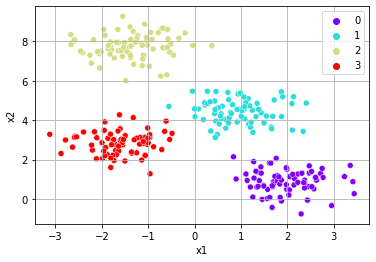

In [59]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
sns.scatterplot(x=df.x1,y=df.x2,hue=kmeans.labels_,palette='rainbow')
plt.grid()

In [60]:
def kmeans_make_blobs(n_clusters):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    sns.scatterplot(x=df.x1,
                    y=df.x2,
                    hue=kmeans.labels_,
                    palette='rainbow')
ipywidgets.interact(kmeans_make_blobs,n_clusters=(1,20));

interactive(children=(IntSlider(value=10, description='n_clusters', max=20, min=1), Output()), _dom_classes=('…

In [61]:
# change random_state from 0 to 50
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=50)
df = pd.DataFrame(X, columns=['x1','x2'])
def kmeans_make_blobs(n_clusters):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    sns.scatterplot(x=df.x1,
                    y=df.x2,
                    hue=kmeans.labels_,
                    palette='rainbow')
ipywidgets.interact(kmeans_make_blobs,n_clusters=(1,20));

interactive(children=(IntSlider(value=10, description='n_clusters', max=20, min=1), Output()), _dom_classes=('…

In [66]:
# change random_state from 80 to 240
X, y = make_blobs(n_samples=240, centers=4, cluster_std=0.60, random_state=240)
df = pd.DataFrame(X, columns=['x1','x2'])
def kmeans_make_blobs(n_clusters):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    sns.scatterplot(x=df.x1,
                    y=df.x2,
                    hue=kmeans.labels_,
                    palette='rainbow')
ipywidgets.interact(kmeans_make_blobs,n_clusters=(1,20));

interactive(children=(IntSlider(value=10, description='n_clusters', max=20, min=1), Output()), _dom_classes=('…

In [63]:
# change random_state from 0 to 50
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=50)
df = pd.DataFrame(X, columns=['x1','x2'])
def kmeans_make_blobs(n_clusters):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    sns.scatterplot(x=df.x1,
                    y=df.x2,
                    hue=kmeans.labels_,
                    palette='rainbow')
ipywidgets.interact(kmeans_make_blobs,n_clusters=(1,20));

interactive(children=(IntSlider(value=10, description='n_clusters', max=20, min=1), Output()), _dom_classes=('…

In [64]:
# change random_state from 200 to 400
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=200)
df = pd.DataFrame(X, columns=['x1','x2'])
def kmeans_make_blobs(n_clusters):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    sns.scatterplot(x=df.x1,
                    y=df.x2,
                    hue=kmeans.labels_,
                    palette='rainbow')
ipywidgets.interact(kmeans_make_blobs,n_clusters=(1,20));

interactive(children=(IntSlider(value=10, description='n_clusters', max=20, min=1), Output()), _dom_classes=('…